Zbiór danych oraz modele, cechy na podstawie artykułu https://www.researchgate.net/publication/355832899_Music_Emotion_Recognition_with_Machine_Learning_Based_on_Audio_Features

In [1]:
import numpy as np
import pandas as pd
import kagglehub
import os
import importlib
import librosa
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.regularizers import l2

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from xgboost import XGBClassifier

import music_tools

In [ ]:
song_path = "resources/turkish-music-emotion-dataset"

In [ ]:
data = []

path_happy = os.path.join(song_path, 'happy')
for file in os.listdir(path_happy):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_happy, filename),
        'emotion': 'happy',
    })

path_angry = os.path.join(song_path, 'angry')
for file in os.listdir(path_angry):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_angry, filename),
        'emotion': 'angry',
    })

path_sad = os.path.join(song_path, 'sad')
for file in os.listdir(path_sad):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_sad, filename),
        'emotion': 'sad',
    })

path_relax = os.path.join(song_path, 'relax')
for file in os.listdir(path_relax):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_relax, filename),
        'emotion': 'relax',
    })

df_turkish = pd.DataFrame.from_records(data)

Ekstrakcja cech z plików audio

In [4]:
features_list = []
for i, song_path in enumerate(df_turkish['path']):
    extracted = music_tools.extract_features(song_path)
    features_list.append(extracted)
    print(f'{i} / {len(df_turkish)}')

features_df = pd.DataFrame(features_list)

0 / 400
1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400


In [5]:
df_turkish = pd.concat([df_turkish, features_df], axis=1)
df_turkish

,path,emotion,rmse_mean,low_energy,tempo_mean,spectral_centroid_mean,spectral_entropy,zcr_mean,mfcc_mean_1,mfcc_mean_2,...,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,chroma_stft_mean_9,chroma_stft_mean_10,chroma_stft_mean_11,chroma_stft_mean_12
0,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.182018,0.530754,135.999178,3139.515121,4.026297,0.058564,-127.231964,130.918716,...,0.548985,0.442507,0.413742,0.396137,0.342646,0.350196,0.321331,0.407206,0.433893,0.445425
1,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.110597,0.550870,107.666016,2050.031017,4.332906,0.051985,-199.692886,171.635818,...,0.583749,0.613214,0.580578,0.621760,0.511587,0.503613,0.408076,0.402224,0.391877,0.411065
2,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.256198,0.618956,97.508844,3882.133726,4.596831,0.096199,-81.960808,112.783768,...,0.514492,0.444701,0.524703,0.488757,0.411683,0.433423,0.483044,0.568057,0.515416,0.503159
3,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.122220,0.535783,82.031250,3041.992248,5.445467,0.097444,-132.773239,144.922882,...,0.298256,0.364022,0.504144,0.357769,0.422638,0.486940,0.513909,0.663626,0.477446,0.486192
4,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.201407,0.579110,129.199219,2428.319134,4.531731,0.054150,-112.031563,163.424347,...,0.329135,0.381885,0.522421,0.486155,0.255896,0.240659,0.208797,0.165721,0.193374,0.292317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,relax,0.124007,0.471177,109.956782,2446.415686,3.429771,0.040156,-235.066284,135.998505,...,0.377753,0.378257,0.430065,0.401265,0.433089,0.532008,0.643993,0.644064,0.460455,0.336084
396,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,relax,0.195241,0.495164,84.720799,1770.504463,3.438049,0.032178,-201.283081,167.863998,...,0.290100,0.321287,0.480864,0.505111,0.400763,0.403689,0.431553,0.494450,0.431156,0.433356
397,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,relax,0.051606,0.551644,59.401940,1497.827872,3.091444,0.028412,-356.165283,160.428696,...,0.327510,0.256320,0.246466,0.225199,0.269421,0.260956,0.157735,0.172231,0.327091,0.443238
398,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,relax,0.056647,0.513545,135.999178,1812.355375,3.456714,0.025118,-326.539185,155.308380,...,0.297711,0.300983,0.325931,0.355852,0.472645,0.574762,0.524301,0.604740,0.553334,0.472946


In [59]:
df_turkish.to_pickle('resources/df_turkish.pkl')

In [140]:
df_turkish = pd.read_pickle('resources/df_turkish.pkl')

In [141]:
X = df_turkish.drop(columns=['emotion', 'path'])
y = df_turkish['emotion']

In [142]:
le = LabelEncoder()
y_en = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42, stratify=y_en)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 32)
(320,)
(80, 32)
(80,)


In [143]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.725
Precision: 0.722
Recall: 0.725
F1-score: 0.720
              precision    recall  f1-score   support

       angry       0.81      0.85      0.83        20
       happy       0.71      0.85      0.77        20
       relax       0.69      0.55      0.61        20
         sad       0.68      0.65      0.67        20

    accuracy                           0.72        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.72      0.72      0.72        80



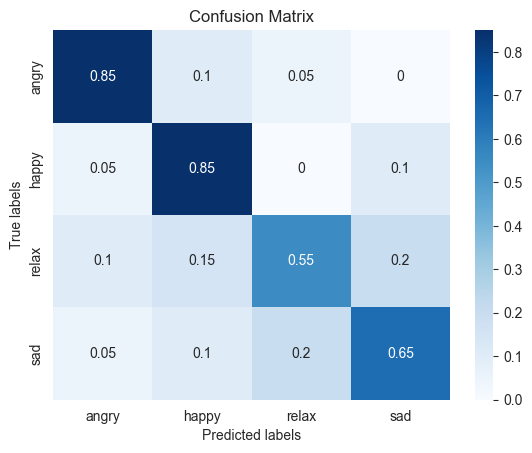

In [129]:
music_tools.show_classification_results(y_pred, y_test, le)

In [119]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy: 0.662
Precision: 0.672
Recall: 0.662
F1-score: 0.649
              precision    recall  f1-score   support

       angry       0.94      0.75      0.83        20
       happy       0.67      0.90      0.77        20
       relax       0.54      0.70      0.61        20
         sad       0.55      0.30      0.39        20

    accuracy                           0.66        80
   macro avg       0.67      0.66      0.65        80
weighted avg       0.67      0.66      0.65        80



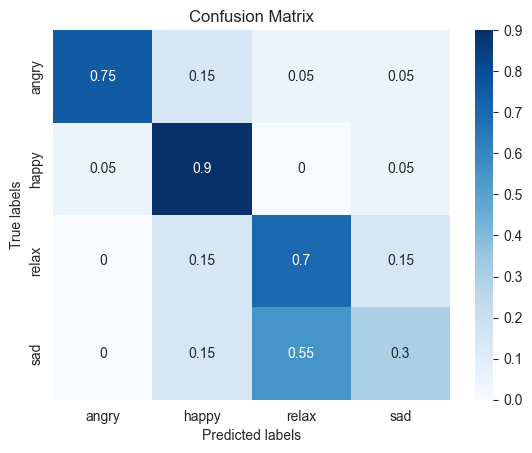

In [120]:
music_tools.show_classification_results(y_pred, y_test, le)

In [13]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

Accuracy: 0.738
Precision: 0.742
Recall: 0.738
F1-score: 0.738
              precision    recall  f1-score   support

       angry       0.84      0.80      0.82        20
       happy       0.73      0.80      0.76        20
       relax       0.78      0.70      0.74        20
         sad       0.62      0.65      0.63        20

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



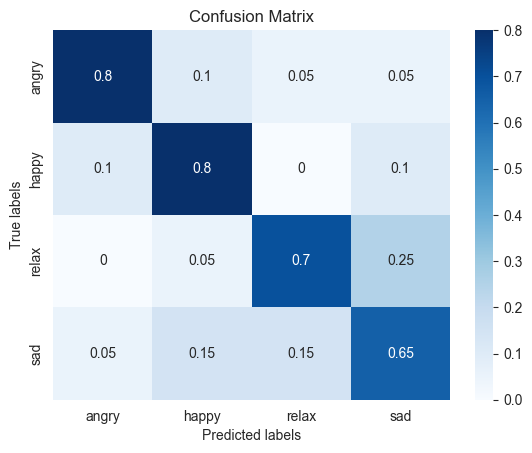

In [14]:
music_tools.show_classification_results(y_pred, y_test, le)

Accuracy: 0.688
Precision: 0.694
Recall: 0.688
F1-score: 0.678
              precision    recall  f1-score   support

       angry       0.84      0.80      0.82        20
       happy       0.63      0.85      0.72        20
       relax       0.67      0.40      0.50        20
         sad       0.64      0.70      0.67        20

    accuracy                           0.69        80
   macro avg       0.69      0.69      0.68        80
weighted avg       0.69      0.69      0.68        80



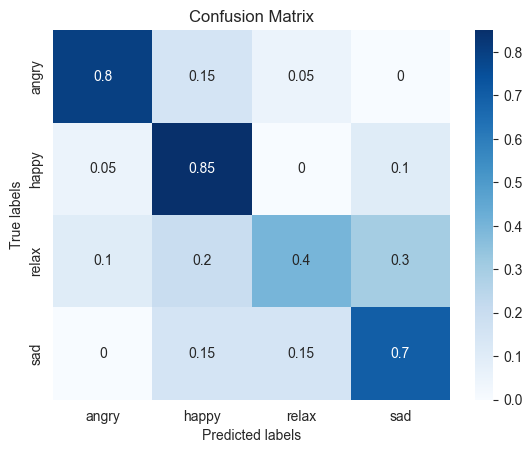

In [15]:
class MedianVotingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def fit(self, X, y):
        self.models_ = [clone(clf).fit(X, y) for clf in self.classifiers]
        return self

    def predict(self, X):
        all_preds = np.asarray([model.predict(X) for model in self.models_])
        return np.median(all_preds, axis=0).round().astype(int)  # zakłada klasy 0,1,2,...

# Przygotuj modele
models = [
    SVC(C=0.5, kernel='linear', probability=False),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=200),
    GaussianNB(),
    LinearDiscriminantAnalysis()
]

# Klasyfikator głosujący
voter = MedianVotingClassifier(models)
voter.fit(X_train, y_train)
y_pred = voter.predict(X_test)

music_tools.show_classification_results(y_pred, y_test, le)

Accuracy: 0.738
Precision: 0.733
Recall: 0.738
F1-score: 0.734
              precision    recall  f1-score   support

       angry       0.86      0.90      0.88        20
       happy       0.73      0.80      0.76        20
       relax       0.65      0.55      0.59        20
         sad       0.70      0.70      0.70        20

    accuracy                           0.74        80
   macro avg       0.73      0.74      0.73        80
weighted avg       0.73      0.74      0.73        80



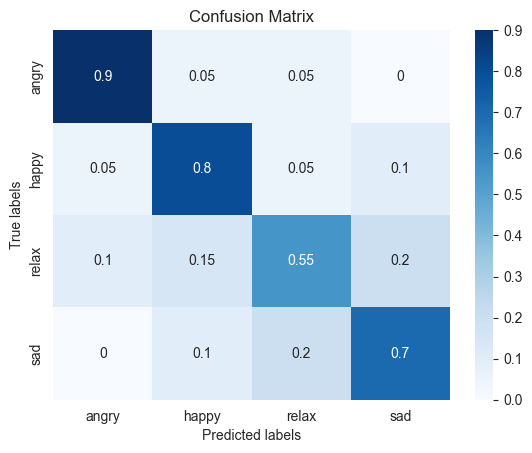

In [16]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

music_tools.show_classification_results(y_pred, y_test, le)

Accuracy: 0.762
Precision: 0.757
Recall: 0.762
F1-score: 0.758
              precision    recall  f1-score   support

       angry       0.85      0.85      0.85        20
       happy       0.82      0.90      0.86        20
       relax       0.71      0.75      0.73        20
         sad       0.65      0.55      0.59        20

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



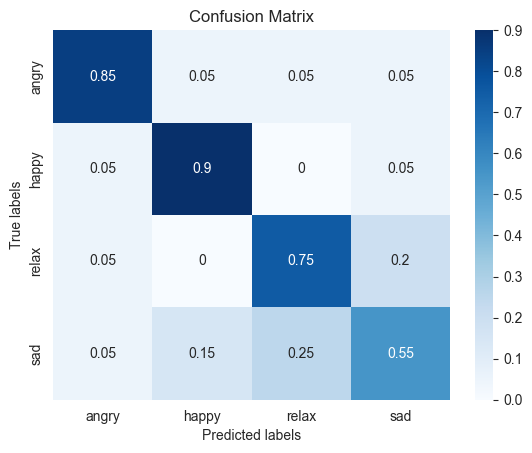

In [17]:
lr_clf = LogisticRegression(C=10.0, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

music_tools.show_classification_results(y_pred, y_test, le)

In [144]:
# num_classes = len(np.unique(y_train))
# input_shape = (X_train.shape[1],)
#
# model = Sequential([
#     Dense(128, activation='relu', input_shape=input_shape),
#     BatchNormalization(),
#     Dropout(0.3),
#
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),
#
#     Dense(num_classes, activation='softmax')
# ])
#
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
#
# model.summary()

num_classes = len(np.unique(y_train))
input_shape = (X_train.shape[1],)

model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape, kernel_regularizer=l2(1e-5)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=l2(1e-5)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,508 (52.77 KB)

 Trainable params: 13,124 (51.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [145]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)],
    verbose=1
)

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1895 - loss: 2.2638 - val_accuracy: 0.4500 - val_loss: 1.2094
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3414 - loss: 1.6136 - val_accuracy: 0.5500 - val_loss: 1.0579
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5359 - loss: 1.1552 - val_accuracy: 0.6750 - val_loss: 0.9641
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6233 - loss: 0.9599 - val_accuracy: 0.6875 - val_loss: 0.9086
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6545 - loss: 0.8357 - val_accuracy: 0.6750 - val_loss: 0.8636
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6055 - loss: 0.9144 - val_accuracy: 0.7000 - val_loss: 0.8205
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6992 - loss: 0.7894 - val_accuracy: 0.7125 - val_loss: 0.7892
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7313 - loss: 0.6792 - val_accuracy: 0.

Accuracy: 0.787
Precision: 0.791
Recall: 0.787
F1-score: 0.788
              precision    recall  f1-score   support

       angry       0.95      0.90      0.92        20
       happy       0.74      0.85      0.79        20
       relax       0.78      0.70      0.74        20
         sad       0.70      0.70      0.70        20

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



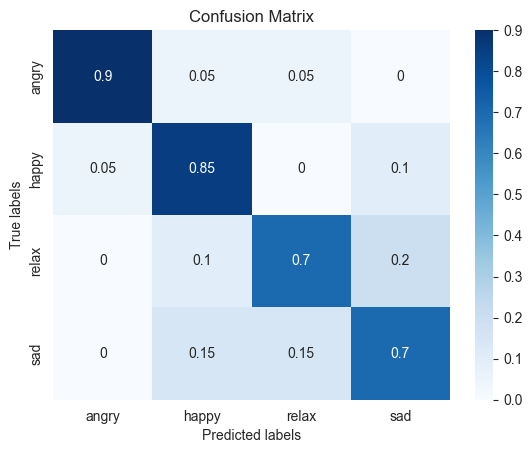

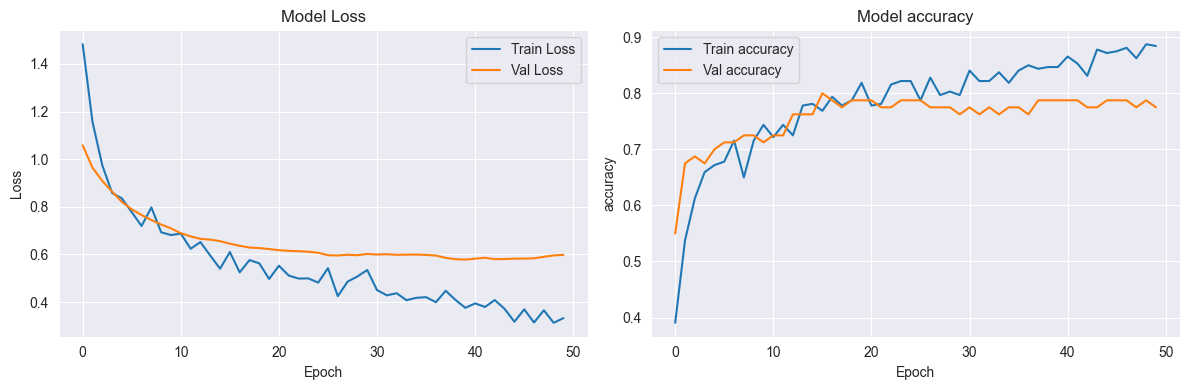

In [146]:
music_tools.show_classification_results(y_pred, y_test, le)
music_tools.plot_trainig_history(history)

In [22]:
num_classes = len(np.unique(y_train))
input_shape = (X_train.shape[1],)

model = Sequential()

model.add(Dense(160, activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(192, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation="softmax"))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 160)            │         5,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 160)            │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 192)            │        24,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           772 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,348 (208.39 KB)

 Trainable params: 52,388 (204.64 KB)

 Non-trainable params: 960 (3.75 KB)

In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)],
    verbose=1
)

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4105 - loss: 1.6527 - val_accuracy: 0.5625 - val_loss: 1.1967
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6468 - loss: 0.8471 - val_accuracy: 0.6625 - val_loss: 1.0962
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7353 - loss: 0.6940 - val_accuracy: 0.6625 - val_loss: 1.0359
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7495 - loss: 0.6072 - val_accuracy: 0.6500 - val_loss: 0.9674
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8034 - loss: 0.4653 - val_accuracy: 0.7000 - val_loss: 0.9163
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8488 - loss: 0.4073 - val_accuracy: 0.6875 - val_loss: 0.8716
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8384 - loss: 0.4404 - val_accuracy: 0.6875 - val_loss: 0.8382
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8697 - loss: 0.3585 - val_accuracy: 0.7250 -

Accuracy: 0.700
Precision: 0.742
Recall: 0.700
F1-score: 0.696
              precision    recall  f1-score   support

       angry       0.94      0.80      0.86        20
       happy       0.71      0.85      0.77        20
       relax       0.80      0.40      0.53        20
         sad       0.52      0.75      0.61        20

    accuracy                           0.70        80
   macro avg       0.74      0.70      0.70        80
weighted avg       0.74      0.70      0.70        80



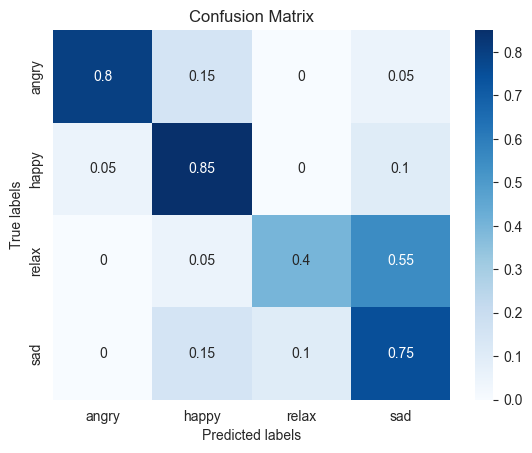

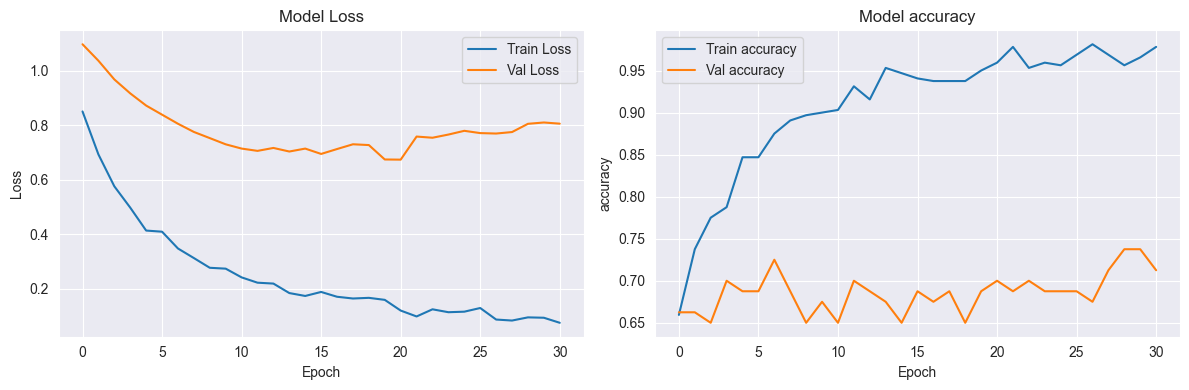

In [24]:
music_tools.show_classification_results(y_pred, y_test, le)
music_tools.plot_trainig_history(history)

In [26]:
# single_audio_path = "C:\\Users\\Gabi\\.cache\\kagglehub\\datasets\\imsparsh\\deam-mediaeval-dataset-emotional-analysis-in-music\\versions\\1\\DEAM_audio\\MEMD_audio\\6.mp3"
# single_features = music_tools.extract_features(single_audio_path)
# X_single = scaler.transform(pd.DataFrame([single_features]))
# y_pred_proba = model.predict(X_single)
# y_pred = np.argmax(y_pred_proba)
# le.inverse_transform([y_pred])

Butterworth filter dolnoprzepustowy i górnoprzepustowy - poprawa wyników

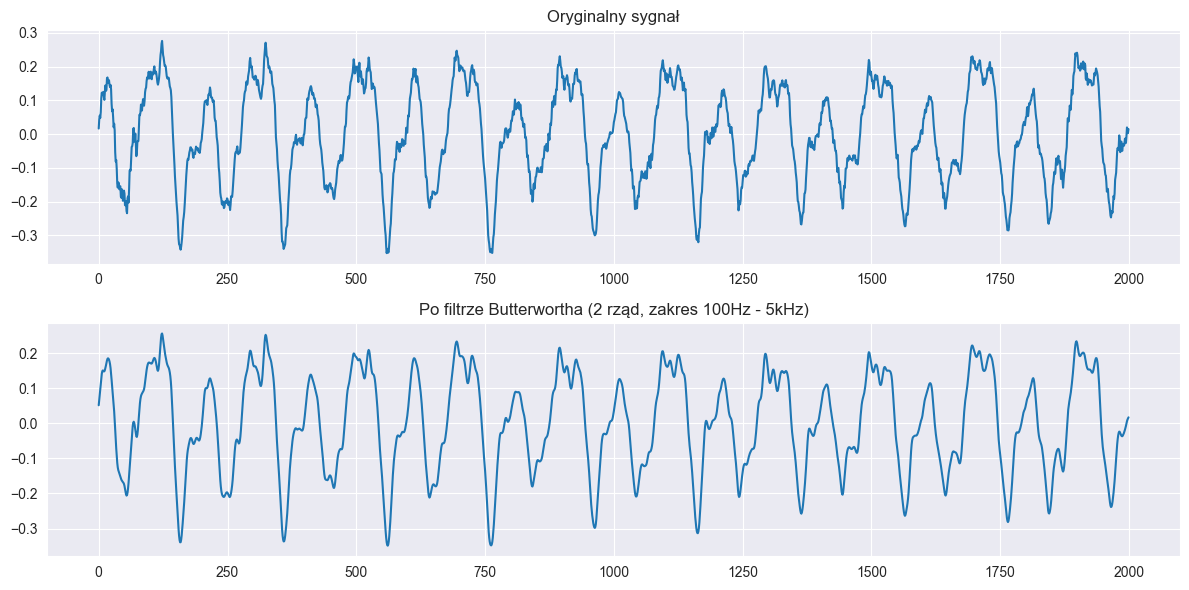

In [27]:
importlib.reload(music_tools)

y, sr = librosa.load(df_turkish.path[0], sr=44100)
y_filt = music_tools.butter_filter(y, sr, cutoff_low=100, order=2, btype='high')
y_filt = music_tools.butter_filter(y_filt, sr, cutoff_high=5000, order=2, btype='low')

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(y[:2000])
plt.title("Oryginalny sygnał")

plt.subplot(2,1,2)
plt.plot(y_filt[:2000])
plt.title("Po filtrze Butterwortha (2 rząd, zakres 100Hz - 5kHz)")
plt.tight_layout()
# plt.show()
plt.savefig('resources/butter_filter.png')


In [55]:
features_list = []
for i, song_path in enumerate(df_turkish['path']):
    extracted = music_tools.extract_features(song_path)
    features_list.append(extracted)
    print(f'{i} / {len(df_turkish)}')

features_df = pd.DataFrame(features_list)
df_turkish_filtered = pd.concat([df_turkish, features_df], axis=1)
df_turkish_filtered

0 / 400
1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400


,path,emotion,rmse_mean,low_energy,tempo_mean,spectral_centroid_mean,spectral_entropy,zcr_mean,mfcc_mean_1,mfcc_mean_2,...,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,chroma_stft_mean_9,chroma_stft_mean_10,chroma_stft_mean_11,chroma_stft_mean_12
0,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.126554,0.503675,135.999178,1502.111571,4.371061,0.040139,-205.209010,205.104684,...,0.486994,0.360000,0.301441,0.295751,0.244965,0.270250,0.243104,0.338334,0.356796,0.362802
1,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.091004,0.567118,107.666016,1630.379165,4.342640,0.049404,-242.277218,200.886678,...,0.549912,0.591363,0.535044,0.583088,0.478792,0.474436,0.364727,0.348559,0.341439,0.370587
2,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.159558,0.585300,97.508844,1787.884049,4.511850,0.046883,-160.040129,186.275384,...,0.426277,0.327377,0.447663,0.380363,0.305081,0.353287,0.423424,0.511123,0.431055,0.412133
3,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.108145,0.526886,82.031250,1952.182562,5.236771,0.074138,-193.067856,198.842323,...,0.275364,0.352406,0.507989,0.347272,0.406980,0.470685,0.508498,0.656906,0.452680,0.440173
4,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,happy,0.182624,0.572147,129.199219,1379.824024,4.306182,0.038225,-169.128637,211.116195,...,0.306676,0.361287,0.505847,0.468648,0.234184,0.218594,0.181808,0.135562,0.164785,0.264982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,relax,0.099660,0.464772,112.347147,1143.676225,3.335941,0.024535,-295.027695,187.627113,...,0.351137,0.343570,0.398172,0.363002,0.395835,0.499931,0.618467,0.620987,0.426923,0.296450
396,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,relax,0.157716,0.528433,84.720799,994.030574,3.531130,0.025152,-247.389504,206.452139,...,0.263881,0.275361,0.434256,0.444358,0.325288,0.331128,0.357351,0.440800,0.380167,0.396193
397,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,relax,0.049485,0.556673,68.906250,872.666778,2.931137,0.020786,-388.167997,180.011094,...,0.313402,0.247365,0.243767,0.224096,0.270489,0.252768,0.146586,0.167434,0.326714,0.438930
398,C:\Users\Gabi\.cache\kagglehub\datasets\blaler...,relax,0.049005,0.536765,135.999178,793.188115,3.356716,0.017924,-382.172603,203.849050,...,0.263704,0.261420,0.283336,0.309974,0.437014,0.550869,0.486653,0.567716,0.518616,0.442136


In [36]:
df_turkish_filtered.to_pickle("resources/df_turkish_filtered.pkl")

In [19]:
df_turkish_filtered = pd.read_pickle("resources/df_turkish_filtered.pkl")

In [148]:
X = df_turkish_filtered.drop(columns=['emotion', 'path'])
y = df_turkish_filtered['emotion']

le = LabelEncoder()
y_en = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42, stratify=y_en)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(320, 64)
(320,)
(80, 64)
(80,)


In [30]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.762
Precision: 0.758
Recall: 0.762
F1-score: 0.756
              precision    recall  f1-score   support

       angry       0.90      0.90      0.90        20
       happy       0.76      0.95      0.84        20
       relax       0.69      0.55      0.61        20
         sad       0.68      0.65      0.67        20

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



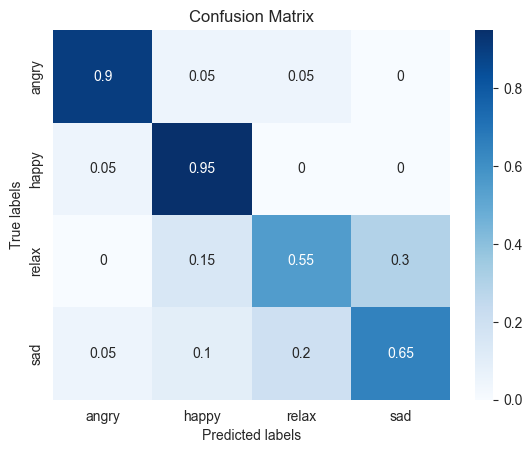

In [31]:
importlib.reload(music_tools)
music_tools.show_classification_results(y_pred, y_test, le)

Accuracy: 0.738
Precision: 0.756
Recall: 0.738
F1-score: 0.734
              precision    recall  f1-score   support

       angry       1.00      0.75      0.86        20
       happy       0.73      0.95      0.83        20
       relax       0.62      0.75      0.68        20
         sad       0.67      0.50      0.57        20

    accuracy                           0.74        80
   macro avg       0.76      0.74      0.73        80
weighted avg       0.76      0.74      0.73        80



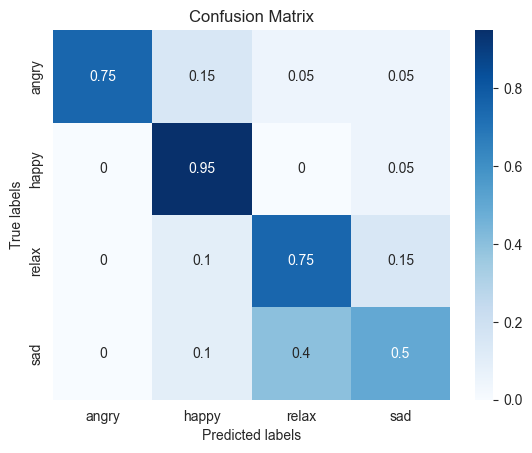

In [91]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

music_tools.show_classification_results(y_pred, y_test, le)

Accuracy: 0.700
Precision: 0.691
Recall: 0.700
F1-score: 0.693
              precision    recall  f1-score   support

       angry       0.82      0.90      0.86        20
       happy       0.77      0.85      0.81        20
       relax       0.62      0.50      0.56        20
         sad       0.55      0.55      0.55        20

    accuracy                           0.70        80
   macro avg       0.69      0.70      0.69        80
weighted avg       0.69      0.70      0.69        80



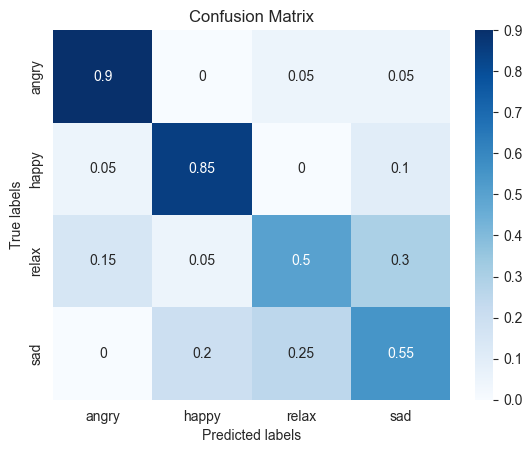

In [92]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

music_tools.show_classification_results(y_pred, y_test, le)

Maksymalne accuracy w artykule dla tego zbioru danych wynosi 79,3%, podczas gdy w tym modelu 81,2%

In [112]:
num_classes = len(np.unique(y_train))
input_shape = (X_train.shape[1],)

model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape, kernel_regularizer=l2(1e-5)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=l2(1e-5)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)],
    verbose=1
)

model.summary()

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,604 (68.77 KB)

 Trainable params: 17,220 (67.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [113]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)],
    verbose=1
)

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.2144 - loss: 2.1743 - val_accuracy: 0.4125 - val_loss: 1.2112
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4486 - loss: 1.4990 - val_accuracy: 0.5000 - val_loss: 1.0228
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5476 - loss: 1.1556 - val_accuracy: 0.6000 - val_loss: 0.8948
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6566 - loss: 0.9289 - val_accuracy: 0.6250 - val_loss: 0.8138
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6514 - loss: 0.8626 - val_accuracy: 0.6500 - val_loss: 0.7673
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7042 - loss: 0.7594 - val_accuracy: 0.7000 - val_loss: 0.7305
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7208 - loss: 0.7605 - val_accuracy: 0.7500 - val_loss: 0.7050
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7302 - loss: 0.7867 - val_accuracy: 0.

Accuracy: 0.812
Precision: 0.818
Recall: 0.812
F1-score: 0.814
              precision    recall  f1-score   support

       angry       0.95      0.90      0.92        20
       happy       0.81      0.85      0.83        20
       relax       0.83      0.75      0.79        20
         sad       0.68      0.75      0.71        20

    accuracy                           0.81        80
   macro avg       0.82      0.81      0.81        80
weighted avg       0.82      0.81      0.81        80



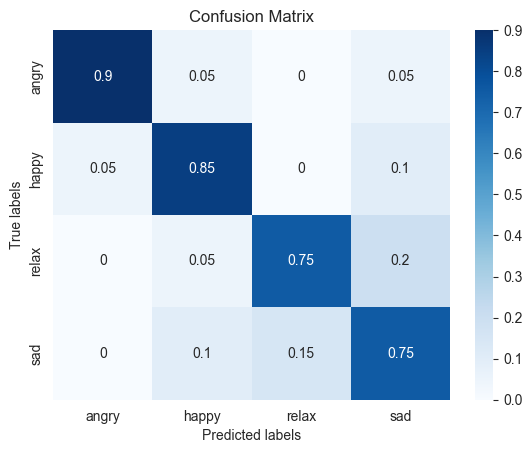

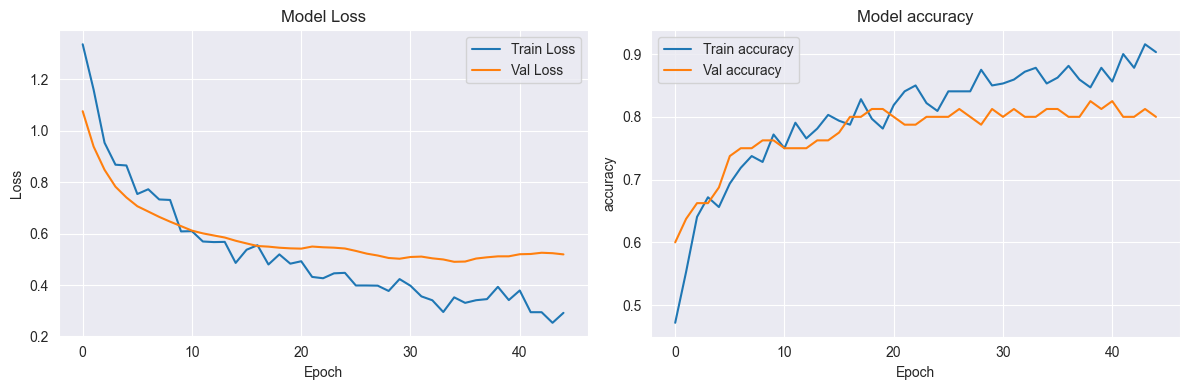

In [94]:
music_tools.show_classification_results(y_pred, y_test, le)
music_tools.plot_trainig_history(history)

Accuracy: 0.812
Precision: 0.816
Recall: 0.812
F1-score: 0.810
              precision    recall  f1-score   support

       angry       0.95      0.90      0.92        20
       happy       0.76      0.95      0.84        20
       relax       0.78      0.70      0.74        20
         sad       0.78      0.70      0.74        20

    accuracy                           0.81        80
   macro avg       0.82      0.81      0.81        80
weighted avg       0.82      0.81      0.81        80



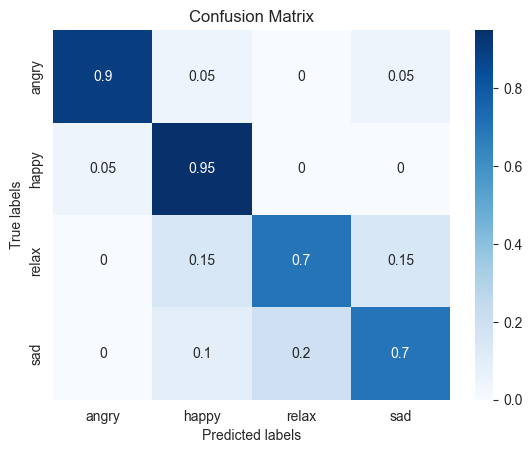

In [155]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

music_tools.show_classification_results(y_pred, y_test, le)

Accuracy: 0.787
Precision: 0.784
Recall: 0.787
F1-score: 0.785
              precision    recall  f1-score   support

       angry       0.90      0.95      0.93        20
       happy       0.81      0.85      0.83        20
       relax       0.74      0.70      0.72        20
         sad       0.68      0.65      0.67        20

    accuracy                           0.79        80
   macro avg       0.78      0.79      0.79        80
weighted avg       0.78      0.79      0.79        80



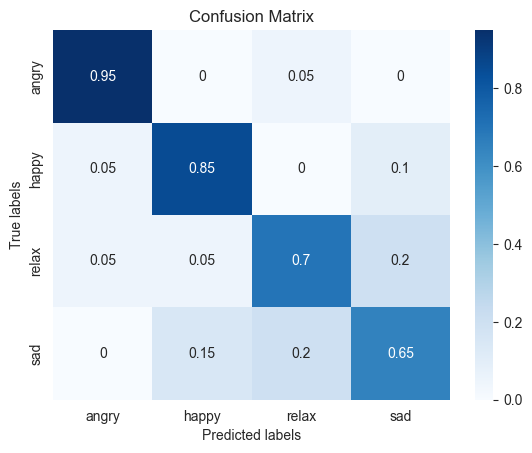

In [57]:
lr_clf = LogisticRegression(C=10.0, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

music_tools.show_classification_results(y_pred, y_test, le)